In [4]:
# Data handling
import pandas as pd
import numpy as np

# Data visualization
import matplotlib.pyplot as plt
import seaborn as sns

# Inline plots
%matplotlib inline


In [5]:
# Load Titanic dataset

df = pd.read_csv("titanic.csv")

# Preview the first 5 rows
print(df.head())
df.head()


   PassengerId  Survived  Pclass  \
0            1         0       3   
1            2         1       1   
2            3         1       3   
3            4         1       1   
4            5         0       3   

                                                Name     Sex   Age  SibSp  \
0                            Braund, Mr. Owen Harris    male  22.0      1   
1  Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
2                             Heikkinen, Miss. Laina  female  26.0      0   
3       Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
4                           Allen, Mr. William Henry    male  35.0      0   

   Parch            Ticket     Fare Cabin Embarked  
0      0         A/5 21171   7.2500   NaN        S  
1      0          PC 17599  71.2833   C85        C  
2      0  STON/O2. 3101282   7.9250   NaN        S  
3      0            113803  53.1000  C123        S  
4      0            373450   8.0500   NaN        S  


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [14]:
# Data info and summary
df.info()           # Data types and missing values
df.describe()       # Summary statistics
df.isnull().sum()   # Missing values check


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [4]:
#Clean Data
# Drop unnecessary columns safely
df.drop(['PassengerId', 'Name', 'Ticket', 'Cabin'], axis=1, inplace=True, errors='ignore')

# Fill missing values safely
if 'Age' in df.columns:
    df['Age'] = pd.to_numeric(df['Age'], errors='coerce')   # ensure numeric
    df['Age'] = df['Age'].fillna(df['Age'].median())        # fill missing

if 'Embarked' in df.columns:
    df['Embarked'] = df['Embarked'].fillna(df['Embarked'].mode()[0])
    df = pd.get_dummies(df, columns=['Embarked'], drop_first=True)

if 'Sex' in df.columns:
    df['Sex'] = df['Sex'].map({'male': 0, 'female': 1})

# Check missing values
print(df.isnull().sum())


Survived      0
Pclass        0
Sex           0
Age           0
SibSp         0
Parch         0
Fare          0
Embarked_Q    0
Embarked_S    0
dtype: int64


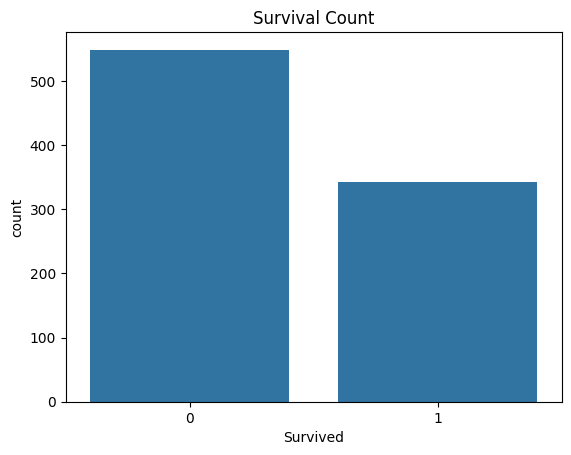

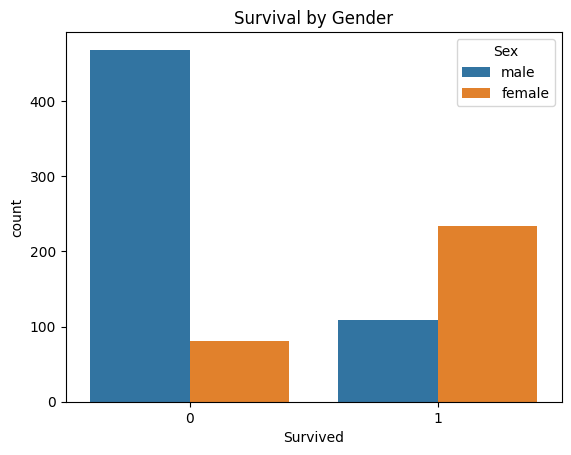

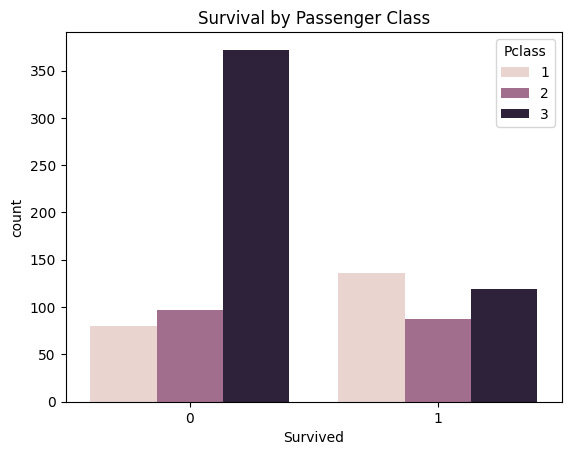

In [15]:
#EDA
# Survival count  - categorical ana
sns.countplot(x='Survived', data=df)
plt.title('Survival Count')
plt.show()

# Survival by gender
sns.countplot(x='Survived', hue='Sex', data=df)
plt.title('Survival by Gender')
plt.show()

# Survival by passenger class
sns.countplot(x='Survived', hue='Pclass', data=df)
plt.title('Survival by Passenger Class')
plt.show()


C:\Users\Admin\AppData\Local\Temp\ipykernel_7668\64900042.py:4: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Age'].fillna(df['Age'].median(), inplace=True)


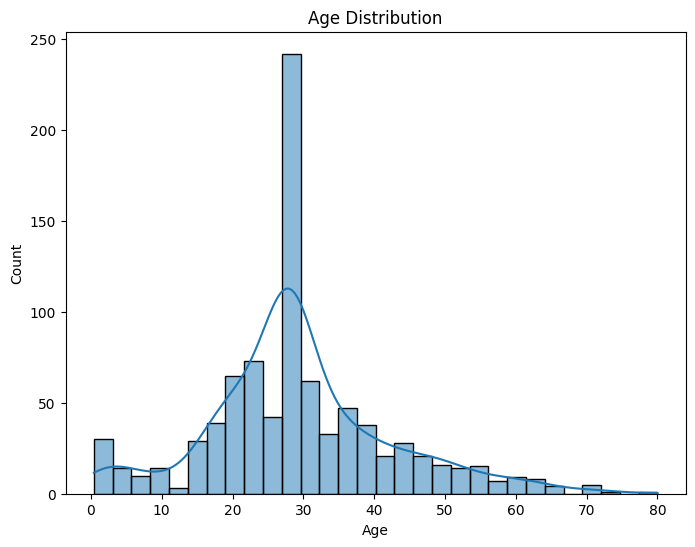

C:\Users\Admin\AppData\Local\Temp\ipykernel_7668\64900042.py:11: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Fare'].fillna(df['Fare'].median(), inplace=True)


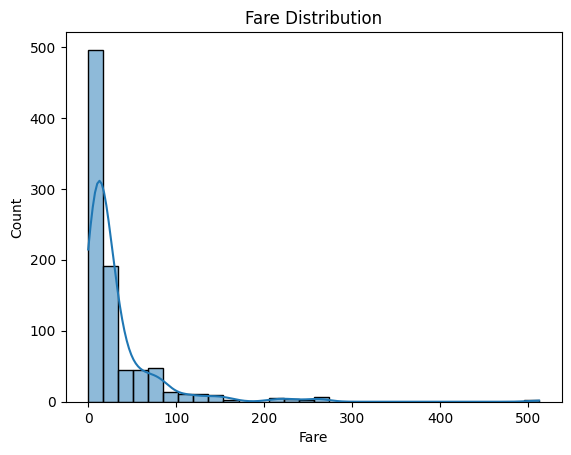

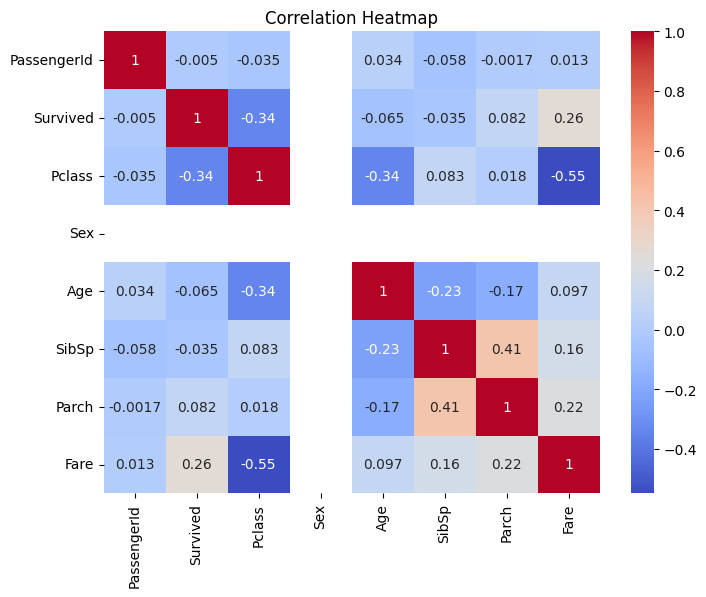

In [18]:
# Age distribution  - Numerical Analysis
if 'Age' in df.columns:
    # Fill missing values to avoid errors
    df['Age'].fillna(df['Age'].median(), inplace=True)
    sns.histplot(df['Age'], bins=30, kde=True)
    plt.title('Age Distribution')
    plt.show()

# Fare distribution
if 'Fare' in df.columns:
    df['Fare'].fillna(df['Fare'].median(), inplace=True)
    sns.histplot(df['Fare'], bins=30, kde=True)
    plt.title('Fare Distribution')
    plt.show()


# Encode categorical columns for correlation
# Convert 'Sex' to numeric
if 'Sex' in df.columns:
    df['Sex'] = df['Sex'].map({'male': 0, 'female': 1})

if 'Embarked' in df.columns:
    df = pd.get_dummies(df, columns=['Embarked'], drop_first=True)

# Correlation heatmap
numeric_df = df.select_dtypes(include=['number'])

plt.figure(figsize=(8,6))
sns.heatmap(numeric_df.corr(), annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()


In [9]:
# Average age
print("Average Age:", df['Age'].mean())

# Survival rate by class
print("\nSurvival Rate by Pclass:")
print(df.groupby('Pclass')['Survived'].mean())

# Survival rate by gender
print("\nSurvival Rate by Gender:")
print(df.groupby('Sex')['Survived'].mean())

# Survival rate by Embarked port
if 'Embarked' in df.columns:
    print("\nSurvival Rate by Embarked Port:")
    print(df.groupby('Embarked')['Survived'].mean())
else:
    print("\nColumn 'Embarked' not found. Available columns are:", df.columns.tolist())

Average Age: 29.69911764705882

Survival Rate by Pclass:
Pclass
1    0.629630
2    0.472826
3    0.242363
Name: Survived, dtype: float64

Survival Rate by Gender:
Sex
female    0.742038
male      0.188908
Name: Survived, dtype: float64

Survival Rate by Embarked Port:
Embarked
C    0.553571
Q    0.389610
S    0.336957
Name: Survived, dtype: float64


In [8]:
print(df.columns.tolist())

['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp', 'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked']


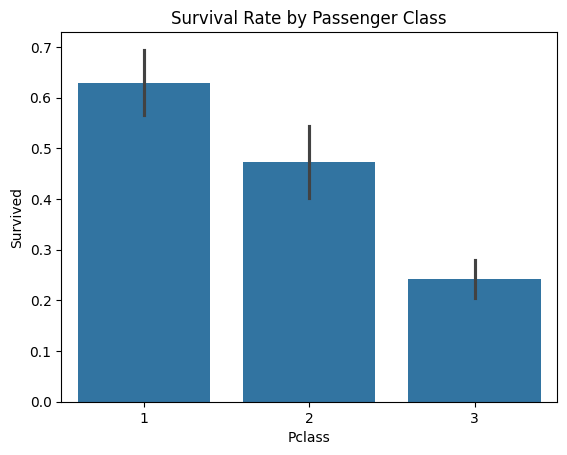

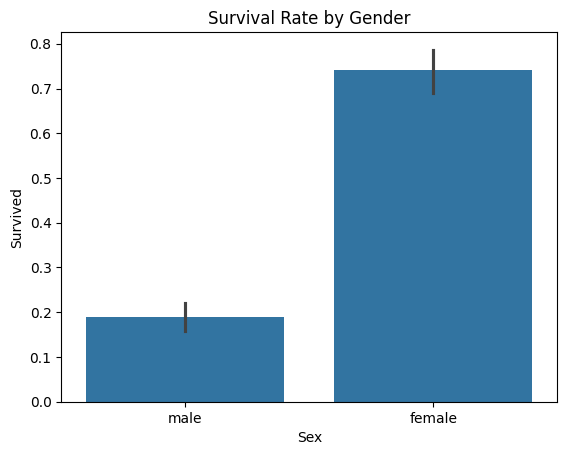

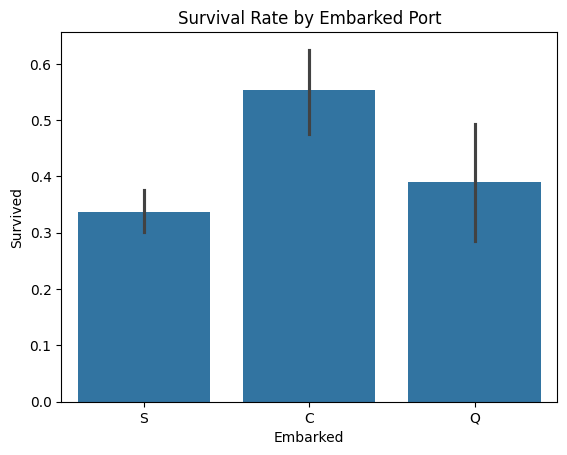

In [10]:
#Visualize Key
sns.barplot(x='Pclass', y='Survived', data=df)
plt.title('Survival Rate by Passenger Class')
plt.show()

sns.barplot(x='Sex', y='Survived', data=df)
plt.title('Survival Rate by Gender')
plt.show()

sns.barplot(x='Embarked', y='Survived', data=df)
plt.title('Survival Rate by Embarked Port')
plt.show()
